In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import load_model, Model
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from datetime import datetime
from misc.utils import generate_generator, gen_imgPaths_and_labelPaths, monitor_mae, monitor_mse, \
                       sample_predictions, first_predictions, calc_mae_mse, get_profile
from sklearn.model_selection import train_test_split

from models import MCNNDS

%matplotlib inline
np.random.seed(123)

Using TensorFlow backend.


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_img, train_labels, test_img, test_labels \
= (
    np.load('./npy/train_img.npy'),
    np.load('./npy/train_labels.npy'),
    np.load('./npy/test_img.npy'),
    np.load('./npy/test_labels.npy')
)

test_img, validation_img, test_labels, validation_labels = train_test_split(test_img, test_labels, test_size=0.5, random_state=24)

## Training on SHHB

In [4]:
model = MCNNDS.MCNNDS()
# =================================================================
# CONFIG
# =================================================================
model_name = 'mcnnds'
submodel_name = 'base'
dataset = "shhb"
epochs = 200
batch_size = 50
# =================================================================

weights_val_path = f'./weights/{model_name}_{submodel_name}_{dataset}_val.hdf5'
checkpointer_best_val = ModelCheckpoint(
    filepath=weights_val_path,
    monitor='val_loss', verbose=0, save_best_only=True, mode='min'
)

weights_train_path = f'./weights/{model_name}_{submodel_name}_{dataset}_train.hdf5'
checkpointer_best_train = ModelCheckpoint(
    filepath=weights_train_path,
    monitor='loss', verbose=0, save_best_only=True, mode='min'
)

checkpointer_tensorboard = TensorBoard(
    log_dir='./exp/'+f"{datetime.now().strftime('%Y%m%d_%H:%M')}_{model_name}_{submodel_name}_{dataset}"
)

model._get_distribution_strategy = lambda: None
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam, metrics=[monitor_mae, monitor_mse])

In [5]:
# # if os.path.exists('./exp/'):
# #     shutil.rmtree('./exp/')
# #     os.makedirs('./exp/')
    
# if os.path.exists(weights_val_path):
#     os.remove(weights_val_path)

# if os.path.exists(weights_train_path):
#     os.remove(weights_train_path)

# # Training
# model._get_distribution_strategy = lambda: None
# history = model.fit(
#     x=train_img, y=train_labels, batch_size=batch_size, epochs=epochs, shuffle= True,
#     validation_data=(validation_img, validation_labels),
#     callbacks=[checkpointer_best_val, checkpointer_best_train, checkpointer_tensorboard],
#     verbose=1
# )

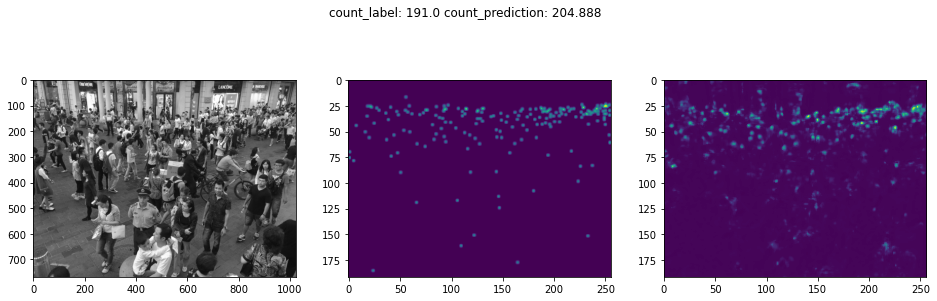

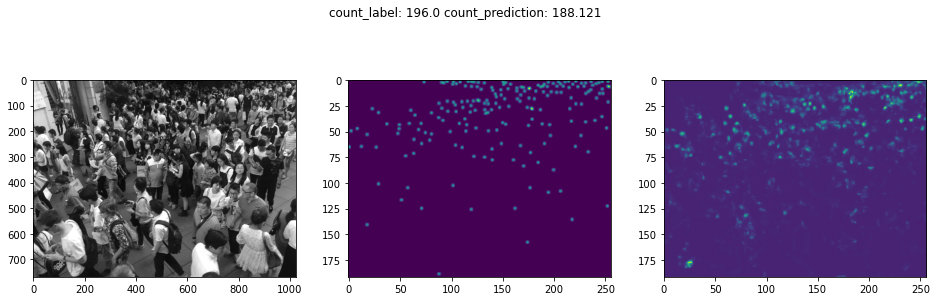

MAE: 32.09 RMSE: 48.82


In [6]:
weights_path = f'./weights/mcnnds_base_shhb_val.hdf5'  # {mcnnds_base_shhb_train,
                                                        #  mcnnds_base_shhb_val}
model = load_model(weights_path, custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})

first_predictions(validation_img, validation_labels, model, 2)
calc_mae_mse(validation_img, validation_labels, model)

## Final test

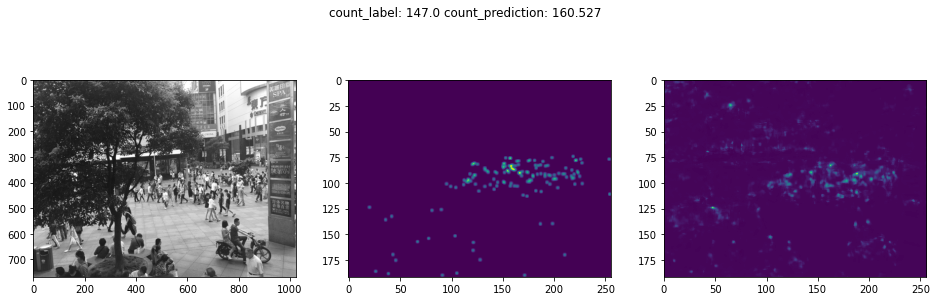

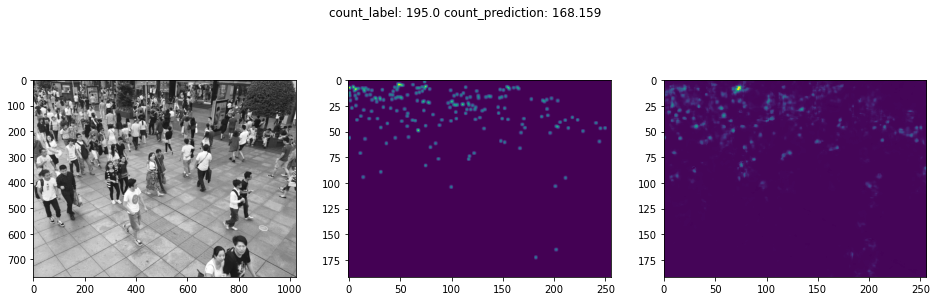

MAE: 33.31 RMSE: 55.51


In [7]:
weights_path = f'./weights/mcnnds_base_shhb_val.hdf5'  # {mcnnds_base_shhb_train,
                                                     #  mcnnds_base_shhb_val}
model = load_model(weights_path, custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})
sample_predictions(test_img, test_labels, model, 2)
calc_mae_mse(test_img, test_labels, model)

## CrowdMask

In [8]:
train_img, train_labels, test_img, test_labels \
= (
    np.load('./npy/masks_train_img.npy'),
    np.load('./npy/masks_train_labels.npy'),
    np.load('./npy/masks_test_img.npy'),
    np.load('./npy/masks_test_labels.npy')
)

test_img, validation_img, test_labels, validation_labels = train_test_split(test_img, test_labels, test_size=0.5, random_state=24)

## Model trained on SHHB

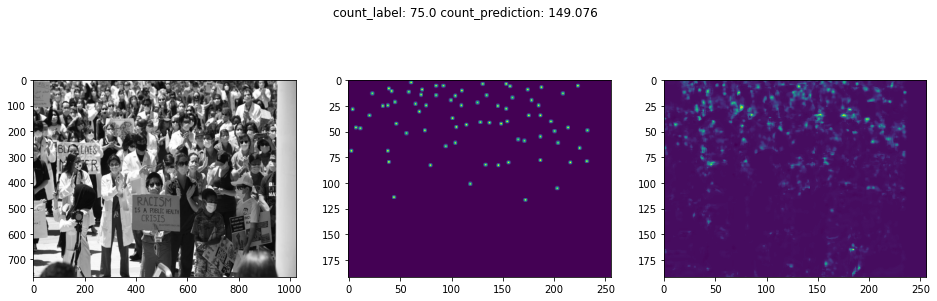

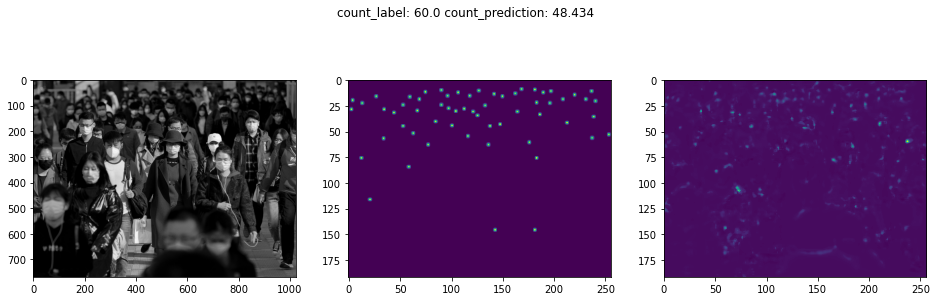

MAE: 30.44 RMSE: 38.57


In [9]:
weights_path = f'./weights/mcnnds_base_shhb_val.hdf5'
model = load_model(weights_path, custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})

first_predictions(validation_img, validation_labels, model, 2)
calc_mae_mse(validation_img, validation_labels, model)

## Unfreeze all layers

In [10]:
weights_path = f'./weights/mcnnds_base_shhb_val.hdf5'
model = load_model(weights_path, custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})
# =================================================================
# CONFIG
# =================================================================
model_name = 'mcnnds'
submodel_name = 'all'
dataset = "masks"
epochs = 150
batch_size = 50
# =================================================================

weights_val_path = f'./weights/{model_name}_{submodel_name}_{dataset}_val.hdf5'
checkpointer_best_val = ModelCheckpoint(
    filepath=weights_val_path,
    monitor='val_loss', verbose=0, save_best_only=True, mode='min'
)

weights_train_path = f'./weights/{model_name}_{submodel_name}_{dataset}_train.hdf5'
checkpointer_best_train = ModelCheckpoint(
    filepath=weights_train_path,
    monitor='loss', verbose=0, save_best_only=True, mode='min'
)

checkpointer_tensorboard = TensorBoard(
    log_dir='./exp/'+f"{datetime.now().strftime('%Y%m%d_%H:%M')}_{model_name}_{submodel_name}_{dataset}_all"
)

model._get_distribution_strategy = lambda: None
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam, metrics=[monitor_mae, monitor_mse])

In [ ]:
# if os.path.exists('./exp/'):
#     shutil.rmtree('./exp/')
#     os.makedirs('./exp/')
    
if os.path.exists(weights_val_path):
    os.remove(weights_val_path)

if os.path.exists(weights_train_path):
    os.remove(weights_train_path)

# Training
model._get_distribution_strategy = lambda: None
history = model.fit(
    x=train_img, y=train_labels, batch_size=batch_size, epochs=epochs, shuffle= True,
    validation_data=(validation_img, validation_labels),
    callbacks=[checkpointer_best_val, checkpointer_best_train, checkpointer_tensorboard],
    verbose=0
)

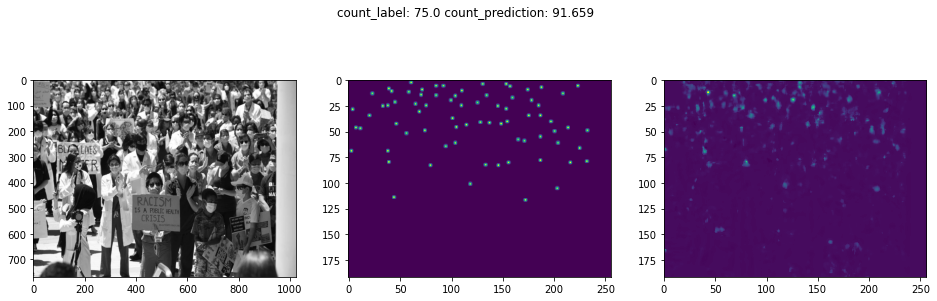

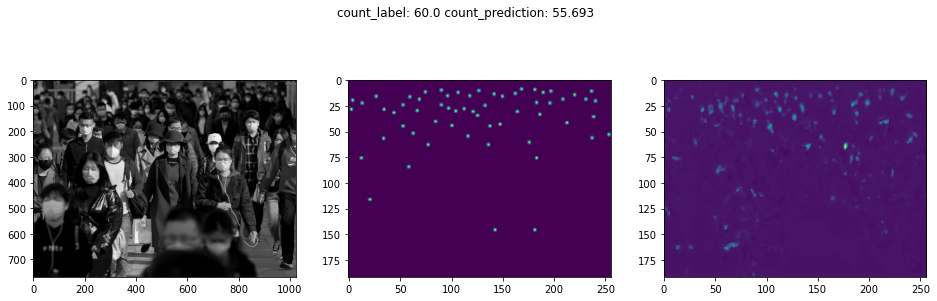

MAE: 19.26 RMSE: 23.26


In [14]:
weights_path = f'./weights/mcnnds_all_masks_val.hdf5'  # {mcnnds_all_masks_train,
                                                        #  mcnnds_all_masks_val}
model = load_model(weights_path, custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})

first_predictions(validation_img, validation_labels, model, 2)
calc_mae_mse(validation_img, validation_labels, model)

## Final test

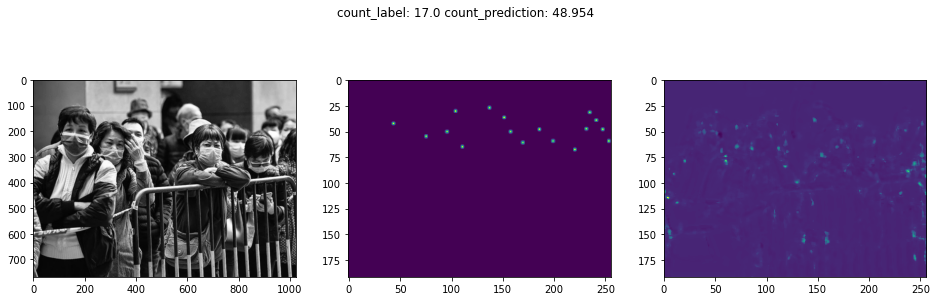

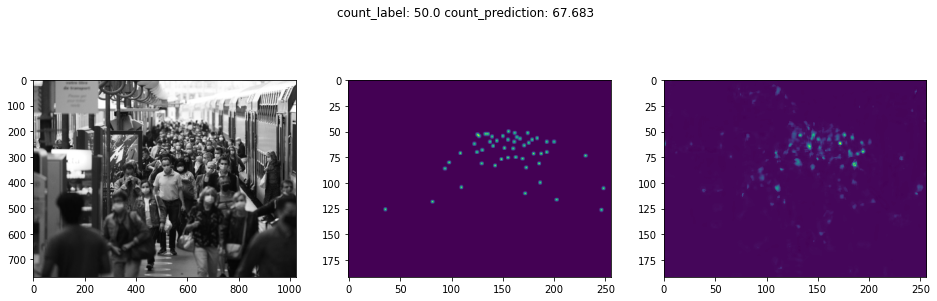

MAE: 18.48 RMSE: 20.96


In [15]:
weights_path = f'./weights/mae_18.48_mcnnds_all_masks_val.hdf5'
model = load_model(weights_path, custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})
sample_predictions(test_img, test_labels, model, 2)
calc_mae_mse(test_img, test_labels, model)